In [222]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

In [223]:
data_path = '../data/'
train_df = pd.read_csv(data_path+'train.csv')
test_df = pd.read_csv(data_path+'test.csv')
submission_df = pd.read_csv(data_path+'sample_submission.csv')
target_df = pd.read_csv(data_path+'revealed_targets.csv')

In [224]:
import matplotlib.pyplot as plt
round(train_df['time_id'].describe(), 2)

count   5237980.00
mean      13310.05
std        7619.27
min           0.00
25%        6729.00
50%       13345.00
75%       19907.00
max       26454.00
Name: time_id, dtype: float64

In [225]:
round(test_df['time_id'].describe(), 2)

count   33000.00
mean    26372.00
std        47.63
min     26290.00
25%     26331.00
50%     26372.00
75%     26413.00
max     26454.00
Name: time_id, dtype: float64

In [226]:
round(target_df['revealed_time_id'].describe(), 2)

count   33000.00
mean    26317.00
std        47.63
min     26235.00
25%     26276.00
50%     26317.00
75%     26358.00
max     26399.00
Name: revealed_time_id, dtype: float64

In [227]:
train_df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,1.00,13380276.64,NaN,NaN,1.00,60651.50,1.00,8493.03,1.00,-3.03,0,0_0_0
1,1,0,0,166603.91,-1,1.00,1642214.25,NaN,NaN,1.00,3233.04,1.00,20605.09,1.00,-5.52,0,0_0_1
2,2,0,0,302879.87,-1,1.00,1819368.03,NaN,NaN,1.00,37956.00,1.00,18995.00,1.00,-8.39,0,0_0_2
3,3,0,0,11917682.27,-1,1.00,18389745.62,NaN,NaN,1.00,2324.90,1.00,479032.40,1.00,-4.01,0,0_0_3
4,4,0,0,447549.96,-1,1.00,17860614.95,NaN,NaN,1.00,16485.54,1.00,434.10,1.00,-7.35,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.00,28280361.74,1.00,1.00,1.00,32257.04,1.00,319862.40,1.00,2.31,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.00,9187699.11,1.00,1.00,1.00,205108.40,1.00,93393.07,1.00,-8.22,26454,480_540_196
5237977,197,480,540,0.00,0,1.00,12725436.10,1.00,1.00,1.00,16790.66,1.00,180038.32,1.00,1.17,26454,480_540_197
5237978,198,480,540,1000898.84,1,1.00,94773271.05,1.00,1.00,1.00,125631.72,1.00,669893.00,1.00,-1.54,26454,480_540_198


In [228]:
train_df[(train_df['stock_id']==0) & (train_df['date_id']==477)].loc[:, ['target', 'time_id']]

,target,time_id
5193980,-2.31,26235
5194180,-7.20,26236
5194380,-7.50,26237
5194580,-12.48,26238
5194780,-9.57,26239
5194980,-9.86,26240
5195180,-10.72,26241
5195380,-3.32,26242
5195580,-2.89,26243
5195780,1.64,26244


In [229]:
test_df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,time_id,row_id
0,0,478,0,3753451.43,-1,1.00,11548975.43,NaN,NaN,1.00,22940.00,1.00,9177.60,1.00,26290,478_0_0
1,1,478,0,985977.11,-1,1.00,3850033.97,NaN,NaN,1.00,1967.90,1.00,19692.00,1.00,26290,478_0_1
2,2,478,0,599128.74,1,1.00,4359198.25,NaN,NaN,1.00,4488.22,1.00,34955.12,1.00,26290,478_0_2
3,3,478,0,2872317.54,-1,1.00,27129551.64,NaN,NaN,1.00,16082.04,1.00,10314.00,1.00,26290,478_0_3
4,4,478,0,740059.14,-1,1.00,8880890.78,NaN,NaN,1.00,19012.35,1.00,7245.60,1.00,26290,478_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32995,195,480,540,2440722.89,-1,1.00,28280361.74,1.00,1.00,1.00,32257.04,1.00,319862.40,1.00,26454,480_540_195
32996,196,480,540,349510.47,-1,1.00,9187699.11,1.00,1.00,1.00,205108.40,1.00,93393.07,1.00,26454,480_540_196
32997,197,480,540,0.00,0,1.00,12725436.10,1.00,1.00,1.00,16790.66,1.00,180038.32,1.00,26454,480_540_197
32998,198,480,540,1000898.84,1,1.00,94773271.05,1.00,1.00,1.00,125631.72,1.00,669893.00,1.00,26454,480_540_198


In [230]:
target_df[(target_df['stock_id']==0) & (target_df['date_id']==478)]

,stock_id,date_id,seconds_in_bucket,time_id,revealed_target,revealed_date_id,revealed_time_id
0,0.00,478,0,26290,-2.31,477.00,26235.00
200,0.00,478,10,26290,-7.20,477.00,26236.00
400,0.00,478,20,26290,-7.50,477.00,26237.00
600,0.00,478,30,26290,-12.48,477.00,26238.00
800,0.00,478,40,26290,-9.57,477.00,26239.00
1000,0.00,478,50,26290,-9.86,477.00,26240.00
1200,0.00,478,60,26290,-10.72,477.00,26241.00
1400,0.00,478,70,26290,-3.32,477.00,26242.00
1600,0.00,478,80,26290,-2.89,477.00,26243.00
1800,0.00,478,90,26290,1.64,477.00,26244.00


In [231]:
from sklearn.metrics import mean_squared_error
origin = train_df.loc[(train_df['stock_id']==2) & (train_df['date_id']==477), 'target']
revealed = target_df.loc[(target_df['stock_id']==2) & (target_df['date_id']==478), 'revealed_target']
mean_squared_error(origin,revealed)

0.0

In [232]:
train_df.iloc[-1]['time_id']

26454

In [233]:
test_df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,time_id,row_id
0,0,478,0,3753451.43,-1,1.00,11548975.43,NaN,NaN,1.00,22940.00,1.00,9177.60,1.00,26290,478_0_0
1,1,478,0,985977.11,-1,1.00,3850033.97,NaN,NaN,1.00,1967.90,1.00,19692.00,1.00,26290,478_0_1
2,2,478,0,599128.74,1,1.00,4359198.25,NaN,NaN,1.00,4488.22,1.00,34955.12,1.00,26290,478_0_2
3,3,478,0,2872317.54,-1,1.00,27129551.64,NaN,NaN,1.00,16082.04,1.00,10314.00,1.00,26290,478_0_3
4,4,478,0,740059.14,-1,1.00,8880890.78,NaN,NaN,1.00,19012.35,1.00,7245.60,1.00,26290,478_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32995,195,480,540,2440722.89,-1,1.00,28280361.74,1.00,1.00,1.00,32257.04,1.00,319862.40,1.00,26454,480_540_195
32996,196,480,540,349510.47,-1,1.00,9187699.11,1.00,1.00,1.00,205108.40,1.00,93393.07,1.00,26454,480_540_196
32997,197,480,540,0.00,0,1.00,12725436.10,1.00,1.00,1.00,16790.66,1.00,180038.32,1.00,26454,480_540_197
32998,198,480,540,1000898.84,1,1.00,94773271.05,1.00,1.00,1.00,125631.72,1.00,669893.00,1.00,26454,480_540_198


In [234]:
submission_df

,time_id,row_id,target
0,26290,478_0_0,1
1,26290,478_0_1,1
2,26290,478_0_2,1
3,26290,478_0_3,1
4,26290,478_0_4,1
...,...,...,...
32995,26454,480_540_195,1
32996,26454,480_540_196,1
32997,26454,480_540_197,1
32998,26454,480_540_198,1


In [235]:
pd.set_option('display.float_format','{:.2f}'.format)
def show_summary(df_):
    print(df_.shape)
    summary_df = pd.DataFrame({'feature':df_.dtypes.index, 'type':df_.dtypes.values})
    summary_df['유니크개수'] = df_.nunique().values
    summary_df['결측치'] = df_.isnull().sum(axis=0).values
    describe = df_.describe().T
    summary_df.loc[(summary_df['type']!='object'), 'mean'] = describe['mean'].values
    summary_df.loc[(summary_df['type']!='object'), 'std'] = describe['std'].values
    summary_df.loc[(summary_df['type']!='object'), 'min'] = describe['min'].values
    summary_df.loc[(summary_df['type']!='object'), 'max'] = describe['max'].values
    summary_df['1th'] = df_.iloc[0].values
    r = np.random.randint(df_.shape[0]) # [0, length)
    summary_df[f'{r}th'] = df_.iloc[r].values
    summary_df.loc[(summary_df['type']=='object')] = summary_df.loc[(summary_df['type']=='object')].fillna(0)
    summary_df = round(summary_df, 1)
    return summary_df

In [236]:
train_df.duplicated().sum()

0

In [237]:
show_summary(train_df)

(5237980, 17)


,feature,type,유니크개수,결측치,mean,std,min,max,1th,1863964th
0,stock_id,int64,200,0,99.30,57.90,0.00,199.00,0,76
1,date_id,int64,481,0,241.50,138.50,0.00,480.00,0,173
2,seconds_in_bucket,int64,55,0,270.00,158.70,0.00,540.00,0,290
3,imbalance_size,float64,2971863,220,5715293.10,20515906.30,0.00,2982027811.70,3180602.69,356901.56
4,imbalance_buy_sell_flag,int64,3,0,-0.00,0.90,-1.00,1.00,1,-1
5,reference_price,float64,28741,220,1.00,0.00,0.90,1.10,1.00,1.00
6,matched_size,float64,2948862,220,45100245.30,139841291.30,4316.60,7713682054.00,13380276.64,4183895.87
7,far_price,float64,95739,2894342,1.00,0.70,0.00,438.00,NaN,NaN
8,near_price,float64,84625,2857180,1.00,0.00,0.80,1.30,NaN,NaN
9,bid_price,float64,28313,220,1.00,0.00,0.90,1.10,1.00,1.00


In [238]:
show_summary(test_df)

(33000, 16)


,feature,type,유니크개수,결측치,mean,std,min,max,1th,2869th
0,stock_id,int64,200,0,99.50,57.70,0.00,199.00,0,69
1,date_id,int64,3,0,479.00,0.80,478.00,480.00,478,478
2,seconds_in_bucket,int64,55,0,270.00,158.70,0.00,540.00,0,140
3,imbalance_size,float64,20327,0,6636938.90,18468274.40,0.00,478154802.30,3753451.43,848789.56
4,imbalance_buy_sell_flag,int64,3,0,-0.10,0.90,-1.00,1.00,-1,1
5,reference_price,float64,5733,0,1.00,0.00,1.00,1.00,1.00,1.01
6,matched_size,float64,18595,0,50988974.40,169510516.90,4316.60,2834016755.10,11548975.43,1687931.93
7,far_price,float64,4269,18229,1.00,0.00,0.80,1.40,NaN,NaN
8,near_price,float64,5461,18000,1.00,0.00,0.90,1.10,NaN,NaN
9,bid_price,float64,5464,0,1.00,0.00,1.00,1.00,1.00,1.00


In [239]:
show_summary(target_df)

(33162, 7)


,feature,type,유니크개수,결측치,mean,std,min,max,1th,17257th
0,stock_id,float64,200,162,99.50,57.70,0.00,199.00,0.00,3.00
1,date_id,int64,3,0,479.00,0.80,478.00,480.00,478.00,479.00
2,seconds_in_bucket,int64,55,0,270.00,158.70,0.00,540.00,0.00,310.00
3,time_id,int64,165,0,26345.10,45.00,26290.00,26454.00,26290.00,26345.00
4,revealed_target,float64,4268,162,-0.20,8.00,-144.40,77.10,-2.30,1.50
5,revealed_date_id,float64,3,162,478.00,0.80,477.00,479.00,477.00,478.00
6,revealed_time_id,float64,165,162,26317.00,47.60,26235.00,26399.00,26235.00,26321.00


In [240]:
train_df[train_df['date_id']>=478]

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
5204980,0,478,0,3753451.43,-1,1.00,11548975.43,NaN,NaN,1.00,22940.00,1.00,9177.60,1.00,-5.43,26290,478_0_0
5204981,1,478,0,985977.11,-1,1.00,3850033.97,NaN,NaN,1.00,1967.90,1.00,19692.00,1.00,-1.87,26290,478_0_1
5204982,2,478,0,599128.74,1,1.00,4359198.25,NaN,NaN,1.00,4488.22,1.00,34955.12,1.00,-0.09,26290,478_0_2
5204983,3,478,0,2872317.54,-1,1.00,27129551.64,NaN,NaN,1.00,16082.04,1.00,10314.00,1.00,-7.61,26290,478_0_3
5204984,4,478,0,740059.14,-1,1.00,8880890.78,NaN,NaN,1.00,19012.35,1.00,7245.60,1.00,-3.29,26290,478_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5237975,195,480,540,2440722.89,-1,1.00,28280361.74,1.00,1.00,1.00,32257.04,1.00,319862.40,1.00,2.31,26454,480_540_195
5237976,196,480,540,349510.47,-1,1.00,9187699.11,1.00,1.00,1.00,205108.40,1.00,93393.07,1.00,-8.22,26454,480_540_196
5237977,197,480,540,0.00,0,1.00,12725436.10,1.00,1.00,1.00,16790.66,1.00,180038.32,1.00,1.17,26454,480_540_197
5237978,198,480,540,1000898.84,1,1.00,94773271.05,1.00,1.00,1.00,125631.72,1.00,669893.00,1.00,-1.54,26454,480_540_198


In [241]:
test_df

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,time_id,row_id
0,0,478,0,3753451.43,-1,1.00,11548975.43,NaN,NaN,1.00,22940.00,1.00,9177.60,1.00,26290,478_0_0
1,1,478,0,985977.11,-1,1.00,3850033.97,NaN,NaN,1.00,1967.90,1.00,19692.00,1.00,26290,478_0_1
2,2,478,0,599128.74,1,1.00,4359198.25,NaN,NaN,1.00,4488.22,1.00,34955.12,1.00,26290,478_0_2
3,3,478,0,2872317.54,-1,1.00,27129551.64,NaN,NaN,1.00,16082.04,1.00,10314.00,1.00,26290,478_0_3
4,4,478,0,740059.14,-1,1.00,8880890.78,NaN,NaN,1.00,19012.35,1.00,7245.60,1.00,26290,478_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32995,195,480,540,2440722.89,-1,1.00,28280361.74,1.00,1.00,1.00,32257.04,1.00,319862.40,1.00,26454,480_540_195
32996,196,480,540,349510.47,-1,1.00,9187699.11,1.00,1.00,1.00,205108.40,1.00,93393.07,1.00,26454,480_540_196
32997,197,480,540,0.00,0,1.00,12725436.10,1.00,1.00,1.00,16790.66,1.00,180038.32,1.00,26454,480_540_197
32998,198,480,540,1000898.84,1,1.00,94773271.05,1.00,1.00,1.00,125631.72,1.00,669893.00,1.00,26454,480_540_198


In [242]:
submission_df

,time_id,row_id,target
0,26290,478_0_0,1
1,26290,478_0_1,1
2,26290,478_0_2,1
3,26290,478_0_3,1
4,26290,478_0_4,1
...,...,...,...
32995,26454,480_540_195,1
32996,26454,480_540_196,1
32997,26454,480_540_197,1
32998,26454,480_540_198,1


In [243]:
s_per_c = train_df.groupby('stock_id')['row_id'].agg('count').reset_index().rename(columns={'row_id':'count'}).sort_values(by='count').reset_index(drop=True)
s_per_c['diff'] = s_per_c['count']-26455
s_per_c

,stock_id,count,diff
0,102,10230,-16225
1,135,15950,-10505
2,79,16500,-9955
3,199,21615,-4840
4,153,22605,-3850
...,...,...,...
195,76,26455,0
196,77,26455,0
197,7,26455,0
198,9,26455,0


In [244]:
sum(s_per_c['diff'])

-53020

In [245]:
train_df[(train_df['stock_id']==0) & (train_df['seconds_in_bucket']==300)]

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
5730,0,0,300,0.00,0,1.00,26670118.88,1.00,1.00,1.00,19319.31,1.00,16149.55,1.00,-10.04,30,0_300_0
16235,0,1,300,2644684.00,1,1.00,11260472.63,1.02,1.01,1.00,93.01,1.00,6511.40,1.00,-5.59,85,1_300_0
26740,0,2,300,0.00,0,1.00,16122712.09,1.00,1.00,1.00,26052.98,1.00,11048.40,1.00,3.56,140,2_300_0
37245,0,3,300,9579868.86,-1,1.00,17509193.32,NaN,0.91,1.00,9201.00,1.00,2854.79,1.00,-3.87,195,3_300_0
47780,0,4,300,6129712.55,-1,1.00,25365589.39,0.98,0.98,1.00,9705.00,1.00,177480.52,1.00,-0.52,250,4_300_0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5188980,0,476,300,11186557.20,-1,1.00,33646348.46,0.95,0.96,1.00,12448.38,1.00,11636.00,1.00,2.76,26210,476_300_0
5199980,0,477,300,14673591.49,-1,1.00,24067387.64,NaN,0.93,1.00,46805.60,1.00,5709.00,1.00,-0.40,26265,477_300_0
5210980,0,478,300,2857934.36,-1,1.00,25665944.86,0.99,0.99,1.00,11367.18,1.00,37150.74,1.00,-8.09,26320,478_300_0
5221980,0,479,300,0.00,0,1.00,53431389.30,1.00,1.00,1.00,5750.00,1.00,28755.00,1.00,0.54,26375,479_300_0


# <추가적인 피쳐 정보>
* stock: 200개
* 피쳐수: 16개 + 타겟 1개
* train 기간: 0~480, 481일
* seconds_in_bucket
    * 0~540 (10씩 증가)
    * stock당 하루 55개의 data가 쌓임
    * 300부터는 far_price와 near_price가 존재함
* 일부 stock의 경우 데이터가 누락됨
    * 종목당 55*481 = 26455 개의 데이터가 있어야 함
    * 11개의 종목이 데이터가 누락됨(아래 그림 참고)
    * 총 length가 5,291,000(200*55*541)이 되어야 하지만 누락건수로 인해 5,237,980이 됨

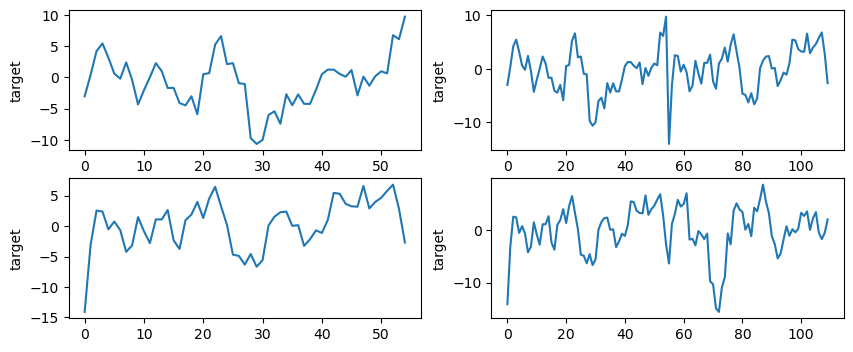

In [246]:
from matplotlib import gridspec

plt.figure(figsize=(10,4))
grid = gridspec.GridSpec(2,2)
ax0, ax1, ax2, ax3 = plt.subplot(grid[0]), plt.subplot(grid[1]), plt.subplot(grid[2]), plt.subplot(grid[3])

sns.lineplot(x=range(55), y=train_df.loc[train_df['stock_id']==0, 'target'].iloc[0:55], ax=ax0) # 0~55
sns.lineplot(x=range(55*2), y=train_df.loc[train_df['stock_id']==0, 'target'].iloc[0:55*2], ax=ax1) # 0~110, 55 변화 체크
sns.lineplot(x=range(55), y=train_df.loc[train_df['stock_id']==0, 'target'].iloc[55:55*2], ax=ax2) # 55~110
sns.lineplot(x=range(55*2), y=train_df.loc[train_df['stock_id']==0, 'target'].iloc[55:55*3], ax=ax3) # 55~165, 110 변화 체크
plt.show()

In [247]:
# null 값 처리
# train_df['far_price'] = train_df['far_price'].fillna(0)
# train_df['near_price'] = train_df['near_price'].fillna(0)

In [248]:
train_df.loc[train_df.isnull().any(axis=1)] # 220

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,1.00,13380276.64,NaN,NaN,1.00,60651.50,1.00,8493.03,1.00,-3.03,0,0_0_0
1,1,0,0,166603.91,-1,1.00,1642214.25,NaN,NaN,1.00,3233.04,1.00,20605.09,1.00,-5.52,0,0_0_1
2,2,0,0,302879.87,-1,1.00,1819368.03,NaN,NaN,1.00,37956.00,1.00,18995.00,1.00,-8.39,0,0_0_2
3,3,0,0,11917682.27,-1,1.00,18389745.62,NaN,NaN,1.00,2324.90,1.00,479032.40,1.00,-4.01,0,0_0_3
4,4,0,0,447549.96,-1,1.00,17860614.95,NaN,NaN,1.00,16485.54,1.00,434.10,1.00,-7.35,0,0_0_4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5236124,144,480,450,9083704.04,-1,1.00,27319450.26,NaN,0.90,1.00,8798.61,1.00,90052.80,1.00,2.84,26445,480_450_144
5236151,171,480,450,7389482.22,-1,1.00,22202291.97,NaN,0.95,1.00,13216.00,1.00,22514.01,1.00,0.07,26445,480_450_171
5236167,187,480,450,8083304.67,1,1.00,29493925.41,NaN,1.04,1.00,30150.72,1.00,11178.28,1.00,-4.17,26445,480_450_187
5236240,60,480,460,29976877.98,-1,0.99,75750325.85,NaN,0.95,0.99,44953.10,0.99,40315.56,0.99,-2.68,26446,480_460_60


In [249]:
selected_features = ['seconds_in_bucket','imbalance_size', 'imbalance_buy_sell_flag', 'reference_price', 'matched_size', 'bid_price', 'bid_size', 'ask_price', 'ask_size', 'wap']

In [250]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
train_dataset = train_df[selected_features+['target']].dropna()
train_dataset = pd.concat([pd.DataFrame(scaler.fit_transform(train_dataset[selected_features]), columns=selected_features), train_dataset['target']], axis=1)

In [251]:
train_dataset.tail()

,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,bid_price,bid_size,ask_price,ask_size,wap,target
5237975,1.00,0.00,0.00,0.46,0.00,0.46,0.00,0.44,0.01,0.45,2.31
5237976,1.00,0.00,0.00,0.46,0.00,0.46,0.01,0.44,0.00,0.45,-8.22
5237977,1.00,0.00,0.50,0.43,0.00,0.43,0.00,0.41,0.00,0.41,1.17
5237978,1.00,0.00,1.00,0.45,0.01,0.45,0.00,0.43,0.01,0.44,-1.54
5237979,1.00,0.00,0.00,0.47,0.00,0.47,0.01,0.45,0.01,0.46,-6.53


In [252]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5237980 entries, 0 to 5237979
Data columns (total 11 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   seconds_in_bucket        float64
 1   imbalance_size           float64
 2   imbalance_buy_sell_flag  float64
 3   reference_price          float64
 4   matched_size             float64
 5   bid_price                float64
 6   bid_size                 float64
 7   ask_price                float64
 8   ask_size                 float64
 9   wap                      float64
 10  target                   float64
dtypes: float64(11)
memory usage: 439.6 MB
